In [13]:
import pandas as pd 
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('target',axis=1)
y= df.target

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=3, train_size=.3)

In [23]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [32]:
pip install --user matplotlib

  Using cached https://files.pythonhosted.org/packages/41/6a/b9b170360c408c1cf1515b608fccd7e3e1f4e0b378f6713c2a552a4dab8c/matplotlib-3.5.3-cp37-cp37m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/90/54/d173ef7c814476f23471781768804356494363a824e312a1bd0fef50344c/kiwisolver-1.4.5-cp37-cp37m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e3/d9/e9bae85e84737e76ebbcbea13607236da0c0699baed0ae4f1151b728a608/fonttools-4.38.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e5/0c/0e3c05b1c87bb6a1c76d281b0f35e78d2d80ac91b5f8f524cebf77f51049/pyparsing-3.1.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ec/7d/01404982db598f271ac7c0d0207860f60ab9288cfacce9872eb567cfbfe3/Pillow-9.5.0-cp37-cp37m-macosx_10_10_x86_64.whl
  The scripts fontto

<AxesSubplot:>

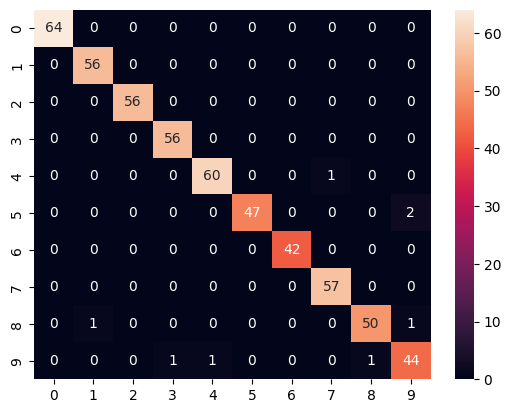

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sn.heatmap(cm,annot=True)

In [59]:
from sklearn.datasets import load_digits

digits = load_digits()
X_train,X_test,y_train,y_test = train_test_split(digits.data, digits.target, random_state=3,test_size=.3)

In [60]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.9851851851851852

<AxesSubplot:>

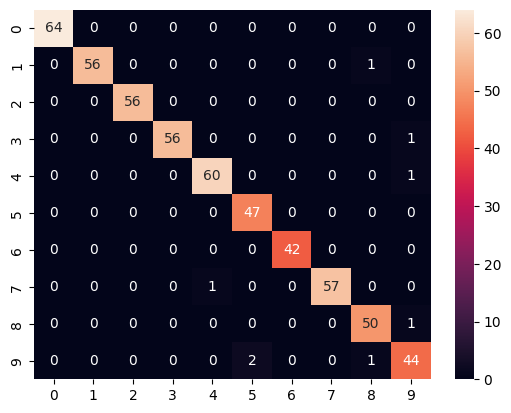

In [61]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
sn.heatmap(cm,annot=True)

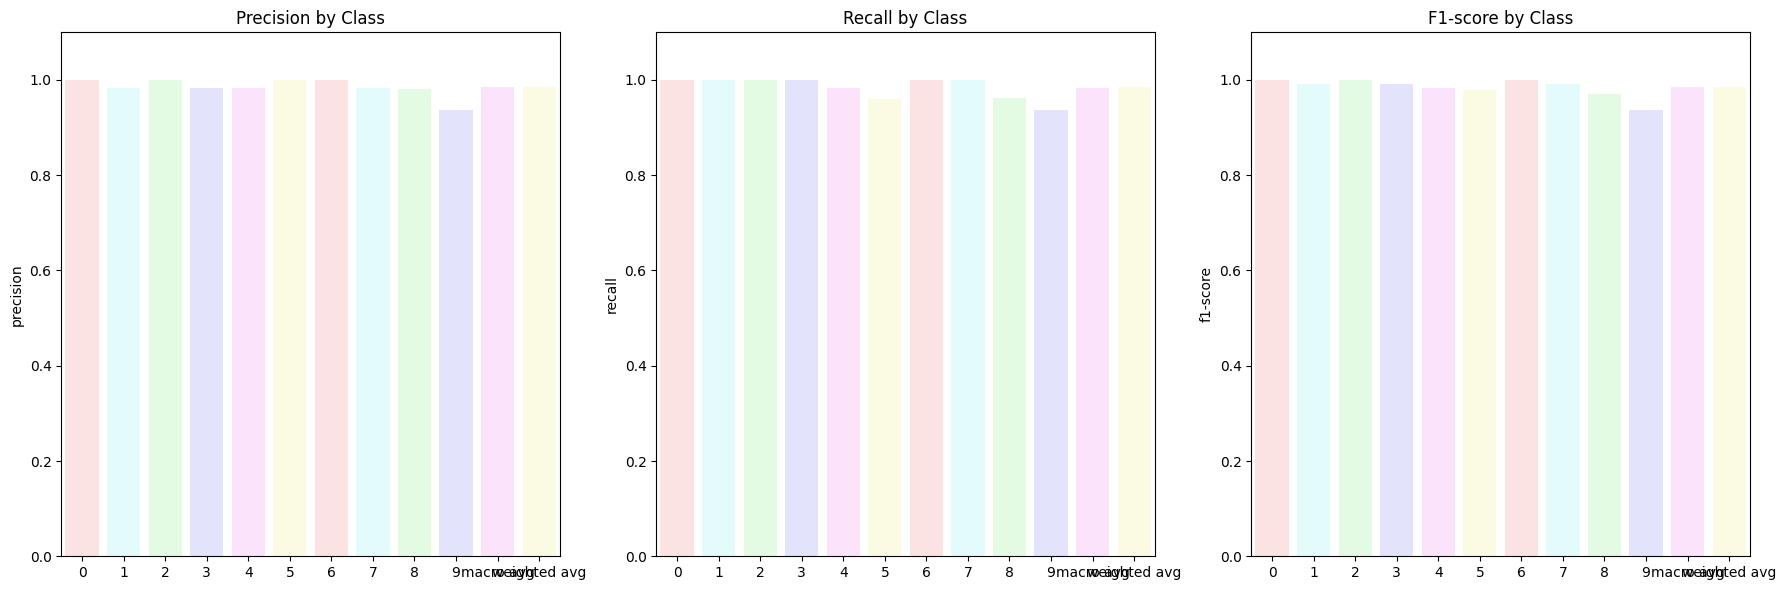

In [62]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test,y_pred,output_dict=True)
def visualize_report(report):
    # Define custom colors
    colors = ['#ffdfdf', '#dfffff', '#dfffdf', '#dfdfff', '#ffdfff', '#ffffdf']

    # Extracting metrics for each class
    metrics = ['precision', 'recall', 'f1-score', 'support']
    data = {metric: [] for metric in metrics}
    labels = []

    # Include class-specific metrics
    for cls, metrics_values in report.items():
        if cls.isdigit() or cls in ['macro avg', 'weighted avg']:
            labels.append(cls)
            for metric in metrics:
                data[metric].append(metrics_values.get(metric, None))

    # Convert data to DataFrame for easy plotting
    df = pd.DataFrame(data, index=labels)

    # Creating subplots for each metric
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for ax, metric in zip(axes, metrics[:-1]):  # Exclude 'support' for plotting
        sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
        ax.set_title(f'{metric.capitalize()} by Class')
        ax.set_ylim(0, 1.1)

    plt.tight_layout()
    plt.show()
visualize_report(class_report)